In [1]:
get_ipython().system('pip install db-dtypes')

In [2]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

CONFIGURE THE BIGQUERY SETTINGS

In [3]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [4]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_training.covid19_cases`
"""

In [5]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
covid19_cases_data = query_job.to_dataframe()
covid19_cases_data.head()

,week_number,start_date,county,fips,cases,deaths
0,9,2021-03-01,Marion,18097,664,23
1,12,2021-03-22,Marion,18097,623,11
2,19,2021-05-10,Marion,18097,1156,4
3,11,2021-03-15,Marion,18097,560,13
4,6,2021-02-08,Marion,18097,1542,219


In [6]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [7]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
pdf = query1_job.to_dataframe()
pdf.head()

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44


In [8]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
# Mdf.to_csv("mixed.csv")
pdf.to_csv("pred.csv")
# udf = pd.read_csv("unemploy.csv")
# wdf = pd.read_csv("wage.csv")
# mdf = pd.read_csv("mixed.csv")

In [9]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
# Mdf.to_csv("mixed.csv")
# pdf.to_csv("pred.csv")
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")
mdf = pd.read_csv("mixed.csv")

NameError: name 'pd' is not defined

In [10]:
import pandas as pd
import numpy as np

In [11]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
# Mdf.to_csv("mixed.csv")
# pdf.to_csv("pred.csv")
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")
mdf = pd.read_csv("mixed.csv")

In [12]:
print(dict(udf.head(1)))

{'Unnamed: 0': 0    0
Name: Unnamed: 0, dtype: int64, 'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0   NaN
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    31-33
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer

In [13]:
# print(dict(mdf.head(1)))
print(dict(udf.head(1)))

{'Unnamed: 0': 0    0
Name: Unnamed: 0, dtype: int64, 'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0   NaN
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    31-33
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer

In [14]:
# mdf.head()
udf.head()

,Unnamed: 0,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN
1,1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0.0,NaN,...,76.0,35.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0
3,3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,10.0,0.0,0.0,NaN,NaN
4,4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0.0,NaN,...,90.0,65.0,0.0,0.0,0.0,135.0,NaN,NaN,NaN,NaN


In [15]:
# mdf = mdf.drop(['Unnamed: 0', 'uu_id_1','countyfips_1', 'tract_1', 'tract_name_1'], axis=1)
udf = udf.drop(['Unnamed: 0'], axis=1)

In [16]:
mdf.head()
udf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0.0,NaN,14.0,...,NaN,NaN,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0.0,NaN,108.0,...,76.0,35.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0.0,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0.0,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,10.0,0.0,0.0,NaN,NaN
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0.0,NaN,69.0,...,90.0,65.0,0.0,0.0,0.0,135.0,NaN,NaN,NaN,NaN


In [17]:
# mdf.head()
udf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0.0,NaN,14.0,...,NaN,NaN,0.0,0.0,0.0,11.0,0.0,0.0,NaN,NaN
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0.0,NaN,108.0,...,76.0,35.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0.0,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0.0,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,10.0,0.0,0.0,NaN,NaN
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0.0,NaN,69.0,...,90.0,65.0,0.0,0.0,0.0,135.0,NaN,NaN,NaN,NaN


In [18]:
# mdf = mdf.replace(np.nan, 0)
udf = udf.replace(np.nan, 0)

In [19]:
# print(dict(mdf.head(1)))
print(dict(udf.head(1)))

{'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0    0.0
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0    0.0
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    31-33
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer3': 0    62
Name: top_category_employer3, dtype: ob

In [20]:
# print(dict(mdf.head(1)))
print(udf.dtypes)

uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
tract_name                 object
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1     object
top_category_employer2     object
top_category_employer3     object
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
dtype: object


In [21]:
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf[emp_cols] = mdf[emp_cols].replace('31-33', "32")
mdf[emp_cols] = mdf[emp_cols].replace('48-49', "48")
mdf[emp_cols] = mdf[emp_cols].replace('44-45', "44")

In [22]:
mdf["top_category_employer1"] = pd.to_numeric(mdf["top_category_employer1"])
mdf["top_category_employer2"] = pd.to_numeric(mdf["top_category_employer2"])
mdf["top_category_employer3"] = pd.to_numeric(mdf["top_category_employer3"])

In [23]:
mdf["top_category_employer1"].unique()

array([32, 48, 56, 72, 23, 54, 61, 11, 62, 44, 81, 52, 42, 71, 92, 51, 53,
       55, 21, 99, 22])

In [24]:
# print(dict(mdf.head(1)))
print(udf.dtypes)
mdf = udf

uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
tract_name                 object
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1     object
top_category_employer2     object
top_category_employer3     object
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
dtype: object


In [25]:
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf[emp_cols] = mdf[emp_cols].replace('31-33', "32")
mdf[emp_cols] = mdf[emp_cols].replace('48-49', "48")
mdf[emp_cols] = mdf[emp_cols].replace('44-45', "44")

In [26]:
mdf["top_category_employer1"] = pd.to_numeric(mdf["top_category_employer1"])
mdf["top_category_employer2"] = pd.to_numeric(mdf["top_category_employer2"])
mdf["top_category_employer3"] = pd.to_numeric(mdf["top_category_employer3"])

In [27]:
mdf["top_category_employer1"].unique()

array([32, 48, 56, 72, 23, 54, 61, 11, 62, 44, 81, 52, 42, 71, 92, 51, 53,
       55, 21, 99, 22])

In [28]:
mdf["top_category_employer2"].unique()

array([51,  0, 22, 11, 21, 99, 23, 42, 52, 53, 54, 55, 56, 61, 62, 71, 72,
       81, 92, 32, 44, 48])

In [29]:
mdf["top_category_employer3"].unique()

array([62, 56,  0, 44, 32, 72, 48, 23, 52, 92, 42, 81, 54, 71, 55, 21, 99,
       61, 51, 53, 22, 11])

In [30]:
mdf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0.0,0.0,108.0,...,76.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0.0,0.0,69.0,...,90.0,65.0,0.0,0.0,0.0,135.0,0.0,0.0,0.0,0.0


In [31]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
mdf.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white'],
      dtype='object')

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3303/2921799004.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


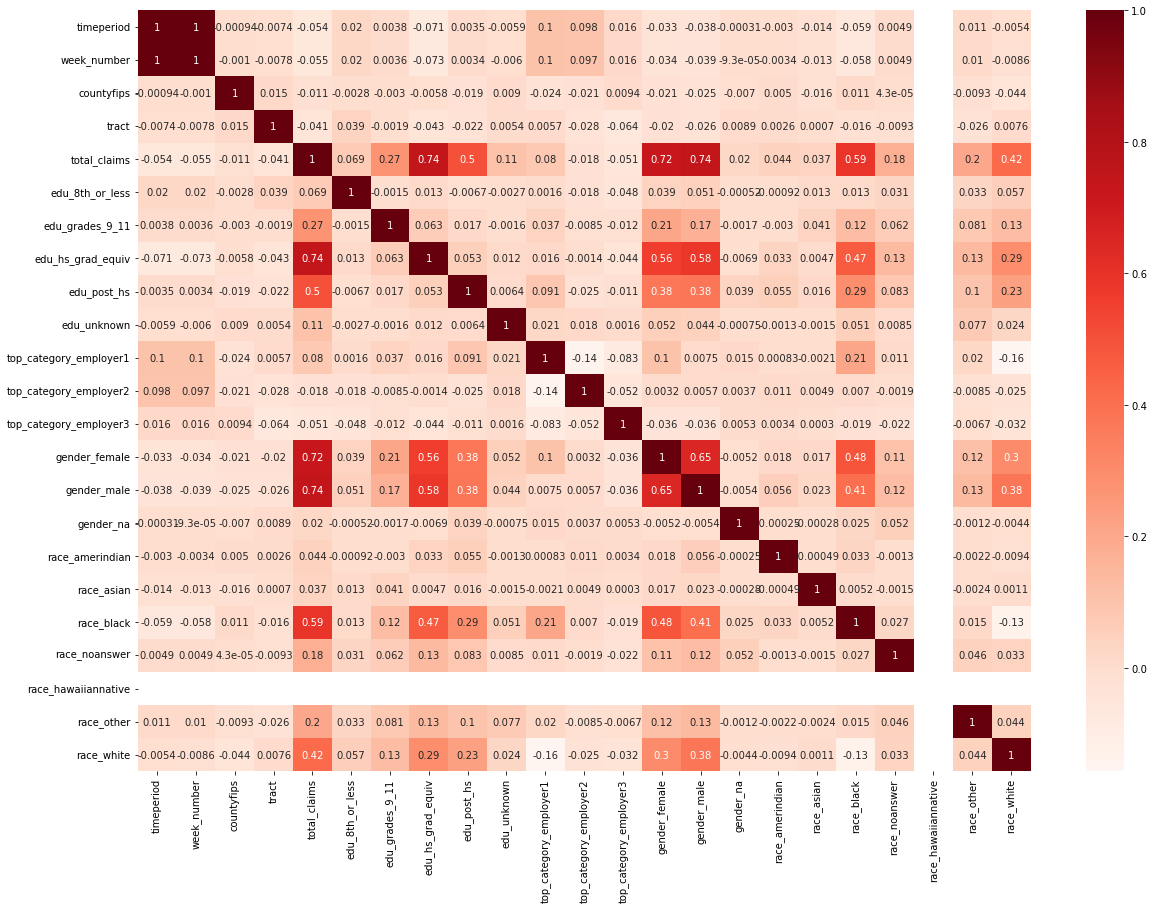

In [33]:
plt.figure(figsize=(20,14))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [34]:
f_df = mdf[["total_claims","edu_hs_grad_equiv","edu_post_hs",'gender_female', 'gender_male', 'race_black', 'race_white','timeperiod', 'week_number',"uu_id"]]

In [35]:
lst = list(f_df['uu_id'].unique())
len(lst)

525

In [36]:
f2_df = f_df[f_df["uu_id"] == lst[2]]
len(f2_df["week_number"])

27

In [37]:
f2_df = f_df[f_df["uu_id"] == lst[1]]
len(f2_df["week_number"])

41

In [38]:
f2_df = f_df[f_df["uu_id"] == lst[6]]
len(f2_df["week_number"])

36

In [39]:
f_df["uu_id"].value_counts

<bound method IndexOpsMixin.value_counts of 0        f013068de98db1470bd986137a0c6d23
1        21957d5517323845818d87623589e1ba
2        6a5609f385912113b6f1014b958ed748
3        46b2882ec4c373527ec33f7bd4f1388d
4        37495d17e82f7df326bfc2c4c090f7b7
                       ...               
16828    f35320206f3dd1ffc411e4ac127caf92
16829    f35320206f3dd1ffc411e4ac127caf92
16830    f35320206f3dd1ffc411e4ac127caf92
16831    bbcb018f0e5e49e13636f6e78ce9f60f
16832    bbcb018f0e5e49e13636f6e78ce9f60f
Name: uu_id, Length: 16833, dtype: object>

In [40]:
f_df["uu_id"].value_counts()

34e6adeedc3b344eb183a0b5e8b4b774    42
bba6b4d023cec7812f6b6c30c570b278    42
d44e7a9d13d3730892b6ffff9af4d595    42
14ceb8012cb1b912044297c8933cfcfc    42
8d7022c454fc05456cfb4b9cadf5f109    42
                                    ..
99c1cb11273b064dc48649886138eb8e     6
747f8bc2b0c8c0a04d29caa4cfe327d2     6
676fffaaecefffe4ce93ca264c5c3c36     6
6fbb60a508283bc1fb30c13ac419941a     5
f7f087af0599e6b2eaa4045ba1a0be50     4
Name: uu_id, Length: 525, dtype: int64

In [41]:
pdf = pd.read_csv("pred.csv")

In [42]:
pdf.value_counts()

Unnamed: 0  uu_id                             week_number
0           5bf51fc2e162d6faf9e3cf79e4198378  44             1
361         dfaf614469f9c8f10d64ceefd9cde4a9  44             1
359         96b3d9311ce32f929ecc8f989d9656e2  44             1
358         4988189262a81dbef85220422f5277fd  44             1
357         bbcb018f0e5e49e13636f6e78ce9f60f  44             1
                                                            ..
170         4b64982fb643e7eee44ce1ef8929cb44  44             1
169         1a37add233259107b266614f22bffd9b  44             1
168         7b4b81e3e66af9462dc475aa2e7427a1  44             1
167         2ce8c1fbabbed69343d1af45e99c4839  44             1
524         932a58530abff8a48558e2a15639d453  44             1
Length: 525, dtype: int64

In [43]:
pdf.drop(["Unnamed: 0"], axis = 1)
pdf.value_counts()

Unnamed: 0  uu_id                             week_number
0           5bf51fc2e162d6faf9e3cf79e4198378  44             1
361         dfaf614469f9c8f10d64ceefd9cde4a9  44             1
359         96b3d9311ce32f929ecc8f989d9656e2  44             1
358         4988189262a81dbef85220422f5277fd  44             1
357         bbcb018f0e5e49e13636f6e78ce9f60f  44             1
                                                            ..
170         4b64982fb643e7eee44ce1ef8929cb44  44             1
169         1a37add233259107b266614f22bffd9b  44             1
168         7b4b81e3e66af9462dc475aa2e7427a1  44             1
167         2ce8c1fbabbed69343d1af45e99c4839  44             1
524         932a58530abff8a48558e2a15639d453  44             1
Length: 525, dtype: int64

In [44]:
pdf = pdf.drop(["Unnamed: 0"], axis = 1)
pdf.value_counts()

uu_id                             week_number
001cd9ae23064d7f0fd3cd327c873d8d  44             1
adf57413c8c1462b6c066f14034bea53  44             1
adef8f4cb061376c14393d4fb9ab3f89  44             1
abf354f67e94370068c7141648efe147  44             1
abd614b6bace46049b465469a384ac0b  44             1
                                                ..
50247c509e6c47b550a516f66e35c1d1  44             1
50088293eaca82f8c05e74c7aa38733f  44             1
4fcf06b3645f8cb516215da638ce5f7f  44             1
4f38233021d41195c29f0a206e75a77e  44             1
fec479d0202d6e1e3f051a9ee902ff5d  44             1
Length: 525, dtype: int64

In [45]:
pdf = pdf.drop(["Unnamed: 0"], axis = 1)
pdf["uu_id"].sort()
pdf.value_counts()

KeyError: "['Unnamed: 0'] not found in axis"

In [46]:
pdf = pdf.drop(["Unnamed: 0"], axis = 1)
sorted(pdf["uu_id"])
pdf.value_counts()

KeyError: "['Unnamed: 0'] not found in axis"

In [47]:
pdf = pdf.drop(["Unnamed: 0"], axis = 1)
pdf["uu_id"]
pdf.value_counts()

KeyError: "['Unnamed: 0'] not found in axis"

In [48]:
pdf = pdf.drop(["Unnamed: 0"], axis = 1)
pdf["uu_id"]
# pdf.value_counts()

KeyError: "['Unnamed: 0'] not found in axis"

In [49]:
pdf["uu_id"]
# pdf.value_counts()

0      5bf51fc2e162d6faf9e3cf79e4198378
1      420b44cc7e3f55d738df565421e59941
2      e39c66ecceec76ee8f9f811fa4a2d246
3      a90462cd11ae4e43144239bf7c4828a4
4      8b20a6749088c7ff1237983076ebfeaa
                     ...               
520    46c4f6c75e663b1ca82ea7994e6d83d3
521    1deebda501712e7595b531b8337bc31a
522    5a9758f65f001b6432ff31ff64a459d7
523    e8b3b95e93a6dc7dbb90f4e72e7ac065
524    932a58530abff8a48558e2a15639d453
Name: uu_id, Length: 525, dtype: object

pdf = pdf.drop(["Unnamed: 0"], axis = 1)

In [50]:
sorted(pdf["uu_id"])
# pdf.value_counts()

['001cd9ae23064d7f0fd3cd327c873d8d',
 '005be9532fd717dc36d4be318fd9ad25',
 '007c1caccff1fbb3a0b8a10790f77141',
 '009683350b175edfc6414d664e4ba873',
 '00f962ce727b8dbbf20925abd5a253dd',
 '02a7b845ab6b3fc2c09a50cdc486db2a',
 '03ba3a9a63be1a5423457246f2846292',
 '050a624d618a68e43fe31189909c644f',
 '05298117cbe0fd69f04f89c83aaac091',
 '05f47cc80d60a67d61e891e2b90c2045',
 '06c78e49b4daedfeb808c42e58fb25e4',
 '06e492b4f29d153af26c659d1f7da2a1',
 '07306ce64b3496b7955efaaf7509d73c',
 '074f501122885ab9aef5e9d07004209d',
 '09fbf26479f644ad33186ec51a90d65d',
 '0abaea6bbc30d7cf8dbacc64727e7091',
 '0ad94f09274e2c9cb0ef5cb77eb334b4',
 '0aed17ab54d56c6651d331418e8db6be',
 '0bdc0df962a3c10541c2aa5220ded58b',
 '0d165590afad07ce71727d690f4aad80',
 '0dc217a2798a141c59b99f5bcff29fa9',
 '0e6523fb3fc17f6a2ac7050972bd4bfd',
 '0eadc4f22396980ecc2e7878ffbaf14a',
 '0f3d45341a5b113b813ffb7be7f58bab',
 '10bd992d086c48a05cb0f1e3df1e20f1',
 '10f34862aa77995d009553a1de67db4f',
 '11a50500827cd49f0ae130201184724f',
 

In [51]:
sorted(f_df["uu_id"])

['001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '001cd9ae23064d7f0fd3cd327c873d8d',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 '005be9532fd717dc36d4be318fd9ad25',
 

In [52]:
sorted(pdf["uu_id"])
pdf.value_counts()

uu_id                             week_number
001cd9ae23064d7f0fd3cd327c873d8d  44             1
adf57413c8c1462b6c066f14034bea53  44             1
adef8f4cb061376c14393d4fb9ab3f89  44             1
abf354f67e94370068c7141648efe147  44             1
abd614b6bace46049b465469a384ac0b  44             1
                                                ..
50247c509e6c47b550a516f66e35c1d1  44             1
50088293eaca82f8c05e74c7aa38733f  44             1
4fcf06b3645f8cb516215da638ce5f7f  44             1
4f38233021d41195c29f0a206e75a77e  44             1
fec479d0202d6e1e3f051a9ee902ff5d  44             1
Length: 525, dtype: int64

In [53]:
sorted(f_df["uu_id"])
fdf.value_counts()

NameError: name 'fdf' is not defined

In [54]:
sorted(f_df["uu_id"])
f_df.value_counts()

total_claims  edu_hs_grad_equiv  edu_post_hs  gender_female  gender_male  race_black  race_white  timeperiod  week_number  uu_id                           
23            0.0                12.0         10.0           13.0         0.0         0.0         20220806    32           7c570ea23642d08f4e1dac443dfca6c0    3
11            0.0                0.0          0.0            0.0          0.0         0.0         20220806    32           8dad735d80cf4a1768bbf15c68e3afa7    3
15            10.0               0.0          0.0            0.0          0.0         0.0         20220806    32           85093fc593ca8c7bc3d9f86346c0c830    3
                                                                                                                           3eaeeb015822cc1c6b77c914fae0d087    3
34            16.0               0.0          0.0            0.0          0.0         0.0         20220806    32           f328006c7c2a699678d33c97ed0b5dde    3
                                       

In [55]:
sorted(f_df["uu_id"])
f_df["uu_id"].value_counts()

34e6adeedc3b344eb183a0b5e8b4b774    42
bba6b4d023cec7812f6b6c30c570b278    42
d44e7a9d13d3730892b6ffff9af4d595    42
14ceb8012cb1b912044297c8933cfcfc    42
8d7022c454fc05456cfb4b9cadf5f109    42
                                    ..
99c1cb11273b064dc48649886138eb8e     6
747f8bc2b0c8c0a04d29caa4cfe327d2     6
676fffaaecefffe4ce93ca264c5c3c36     6
6fbb60a508283bc1fb30c13ac419941a     5
f7f087af0599e6b2eaa4045ba1a0be50     4
Name: uu_id, Length: 525, dtype: int64

In [56]:
pdf["uu_id"]=sorted(pdf["uu_id"])
pdf.value_counts()

uu_id                             week_number
001cd9ae23064d7f0fd3cd327c873d8d  44             1
adf57413c8c1462b6c066f14034bea53  44             1
adef8f4cb061376c14393d4fb9ab3f89  44             1
abf354f67e94370068c7141648efe147  44             1
abd614b6bace46049b465469a384ac0b  44             1
                                                ..
50247c509e6c47b550a516f66e35c1d1  44             1
50088293eaca82f8c05e74c7aa38733f  44             1
4fcf06b3645f8cb516215da638ce5f7f  44             1
4f38233021d41195c29f0a206e75a77e  44             1
fec479d0202d6e1e3f051a9ee902ff5d  44             1
Length: 525, dtype: int64

In [57]:
f2_df = f_df[f_df["uu_id"] == "6a4357ec916e146c5329ac2498a84f66"]
f2_df["week_number"]

Series([], Name: week_number, dtype: int64)

In [58]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f2_df["week_number"]

1544      5
5940     28
5941     31
5942     12
8928     35
8929     27
8930      1
8931     29
8932     17
8933     32
8934      3
8935     37
8936     32
8937     34
8938     30
8939      8
8940     36
8941      6
8942     37
8943     33
8944     35
8945     13
8946     36
8947     33
8948      7
8949      9
8950     10
8951     24
8952     32
8953     34
8954     16
11179    18
11180     2
11181    14
11182    11
11183    20
11992    25
11993    19
13783    15
13784    21
13785    26
15298    22
Name: week_number, dtype: int64

In [59]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f2_df["week_number"].value_counts()

32    3
33    2
37    2
35    2
36    2
34    2
24    1
16    1
18    1
2     1
14    1
11    1
9     1
20    1
25    1
19    1
15    1
21    1
26    1
10    1
5     1
7     1
13    1
28    1
6     1
8     1
30    1
3     1
17    1
29    1
1     1
27    1
12    1
31    1
22    1
Name: week_number, dtype: int64

In [60]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1" and f_df["week_number"] == 3]
# f2_df["week_number"].value_counts()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [61]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1", f_df["week_number"] == 3]
# f2_df["week_number"].value_counts()

InvalidIndexError: (0        False
1        False
2        False
3        False
4        False
         ...  
16828    False
16829    False
16830    False
16831    False
16832    False
Name: uu_id, Length: 16833, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
16828    False
16829    False
16830    False
16831    False
16832    False
Name: week_number, Length: 16833, dtype: bool)

In [62]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1" f_df["week_number"] == 3]
# f2_df["week_number"].value_counts()

SyntaxError: invalid syntax (611718809.py, line 1)

In [63]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f2_df = f2_df[f2_df["week_number"] == 3]
# f2_df["week_number"].value_counts()

In [64]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f2_df = f2_df[f2_df["week_number"] == 3]\
f2_df
# f2_df["week_number"].value_counts()

SyntaxError: invalid syntax (4187914474.py, line 3)

In [65]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f2_df = f2_df[f2_df["week_number"] == 3]
f2_df
# f2_df["week_number"].value_counts()

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
8934,21,12.0,0.0,0.0,0.0,0.0,17.0,20220115,3,50247c509e6c47b550a516f66e35c1d1


In [66]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
# f2_df = f2_df[f2_df["week_number"] == 3]
# f2_df
f2_df["week_number"].value_counts()

32    3
33    2
37    2
35    2
36    2
34    2
24    1
16    1
18    1
2     1
14    1
11    1
9     1
20    1
25    1
19    1
15    1
21    1
26    1
10    1
5     1
7     1
13    1
28    1
6     1
8     1
30    1
3     1
17    1
29    1
1     1
27    1
12    1
31    1
22    1
Name: week_number, dtype: int64

In [67]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f2_df = f2_df[f2_df["week_number"] == 32]
f2_df
# f2_df["week_number"].value_counts()

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
8933,14,0.0,0.0,0.0,0.0,0.0,0.0,20220806,32,50247c509e6c47b550a516f66e35c1d1
8936,14,0.0,0.0,0.0,0.0,0.0,0.0,20220806,32,50247c509e6c47b550a516f66e35c1d1
8952,14,0.0,0.0,0.0,0.0,0.0,0.0,20220806,32,50247c509e6c47b550a516f66e35c1d1


In [68]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df[f2_df["week_number"] == 32]
f3_df
# f2_df["week_number"].value_counts()

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
8933,14,0.0,0.0,0.0,0.0,0.0,0.0,20220806,32,50247c509e6c47b550a516f66e35c1d1
8936,14,0.0,0.0,0.0,0.0,0.0,0.0,20220806,32,50247c509e6c47b550a516f66e35c1d1
8952,14,0.0,0.0,0.0,0.0,0.0,0.0,20220806,32,50247c509e6c47b550a516f66e35c1d1


In [69]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df[f2_df["week_number"] == 32]
f3_df
f2_df["week_number"].value_counts()

32    3
33    2
37    2
35    2
36    2
34    2
24    1
16    1
18    1
2     1
14    1
11    1
9     1
20    1
25    1
19    1
15    1
21    1
26    1
10    1
5     1
7     1
13    1
28    1
6     1
8     1
30    1
3     1
17    1
29    1
1     1
27    1
12    1
31    1
22    1
Name: week_number, dtype: int64

In [70]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df[f2_df["week_number"] == 33]
f3_df
# f2_df["week_number"].value_counts()

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
8943,24,18.0,0.0,11.0,13.0,0.0,20.0,20220813,33,50247c509e6c47b550a516f66e35c1d1
8947,24,18.0,0.0,11.0,13.0,0.0,20.0,20220813,33,50247c509e6c47b550a516f66e35c1d1


In [71]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
# f3_df = f2_df[f2_df["week_number"] == 33]
# f3_df
f2_df["edu_hs_grad_equiv"].value_counts()

0.0     22
12.0     4
10.0     4
11.0     3
13.0     3
18.0     3
15.0     2
14.0     1
Name: edu_hs_grad_equiv, dtype: int64

In [72]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
# f3_df = f2_df[f2_df["week_number"] == 33]
# f3_df
f2_df.value_counts()

total_claims  edu_hs_grad_equiv  edu_post_hs  gender_female  gender_male  race_black  race_white  timeperiod  week_number  uu_id                           
14            0.0                0.0          0.0            0.0          0.0         0.0         20220806    32           50247c509e6c47b550a516f66e35c1d1    3
25            0.0                0.0          13.0           12.0         0.0         21.0        20220910    37           50247c509e6c47b550a516f66e35c1d1    2
14            0.0                0.0          0.0            0.0          0.0         0.0         20220827    35           50247c509e6c47b550a516f66e35c1d1    2
24            13.0               0.0          0.0            0.0          0.0         0.0         20220903    36           50247c509e6c47b550a516f66e35c1d1    2
              18.0               0.0          11.0           13.0         0.0         20.0        20220813    33           50247c509e6c47b550a516f66e35c1d1    2
16            0.0                0.0   

In [73]:
f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
# f3_df = f2_df[f2_df["week_number"] == 33]
# f3_df
f2_df.drop_duplicates()
f2_df.value_counts()

total_claims  edu_hs_grad_equiv  edu_post_hs  gender_female  gender_male  race_black  race_white  timeperiod  week_number  uu_id                           
14            0.0                0.0          0.0            0.0          0.0         0.0         20220806    32           50247c509e6c47b550a516f66e35c1d1    3
25            0.0                0.0          13.0           12.0         0.0         21.0        20220910    37           50247c509e6c47b550a516f66e35c1d1    2
14            0.0                0.0          0.0            0.0          0.0         0.0         20220827    35           50247c509e6c47b550a516f66e35c1d1    2
24            13.0               0.0          0.0            0.0          0.0         0.0         20220903    36           50247c509e6c47b550a516f66e35c1d1    2
              18.0               0.0          11.0           13.0         0.0         20.0        20220813    33           50247c509e6c47b550a516f66e35c1d1    2
16            0.0                0.0   

In [74]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
# f3_df = f2_df[f2_df["week_number"] == 33]
# f3_df
# f2_df.drop_duplicates()
f2_df

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
1544,20,0.0,11.0,0.0,0.0,0.0,16.0,20220129,5,50247c509e6c47b550a516f66e35c1d1
5940,14,0.0,0.0,0.0,0.0,0.0,0.0,20220709,28,50247c509e6c47b550a516f66e35c1d1
5941,26,15.0,0.0,0.0,0.0,0.0,0.0,20220730,31,50247c509e6c47b550a516f66e35c1d1
5942,25,0.0,0.0,14.0,11.0,0.0,0.0,20220319,12,50247c509e6c47b550a516f66e35c1d1
8928,14,0.0,0.0,0.0,0.0,0.0,0.0,20220827,35,50247c509e6c47b550a516f66e35c1d1
8929,21,12.0,0.0,0.0,0.0,0.0,15.0,20220702,27,50247c509e6c47b550a516f66e35c1d1
8930,22,12.0,0.0,0.0,0.0,0.0,14.0,20220101,1,50247c509e6c47b550a516f66e35c1d1
8931,25,12.0,0.0,12.0,13.0,0.0,16.0,20220716,29,50247c509e6c47b550a516f66e35c1d1
8932,21,14.0,0.0,0.0,0.0,0.0,16.0,20220423,17,50247c509e6c47b550a516f66e35c1d1
8933,14,0.0,0.0,0.0,0.0,0.0,0.0,20220806,32,50247c509e6c47b550a516f66e35c1d1


In [75]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
# f3_df = f2_df[f2_df["week_number"] == 33]
# f3_df
# f2_df.drop_duplicates()
len(f2_df)

42

In [76]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
# f3_df = f2_df[f2_df["week_number"] == 33]
# f3_df
# f2_df.drop_duplicates()
f2_df

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
1544,20,0.0,11.0,0.0,0.0,0.0,16.0,20220129,5,50247c509e6c47b550a516f66e35c1d1
5940,14,0.0,0.0,0.0,0.0,0.0,0.0,20220709,28,50247c509e6c47b550a516f66e35c1d1
5941,26,15.0,0.0,0.0,0.0,0.0,0.0,20220730,31,50247c509e6c47b550a516f66e35c1d1
5942,25,0.0,0.0,14.0,11.0,0.0,0.0,20220319,12,50247c509e6c47b550a516f66e35c1d1
8928,14,0.0,0.0,0.0,0.0,0.0,0.0,20220827,35,50247c509e6c47b550a516f66e35c1d1
8929,21,12.0,0.0,0.0,0.0,0.0,15.0,20220702,27,50247c509e6c47b550a516f66e35c1d1
8930,22,12.0,0.0,0.0,0.0,0.0,14.0,20220101,1,50247c509e6c47b550a516f66e35c1d1
8931,25,12.0,0.0,12.0,13.0,0.0,16.0,20220716,29,50247c509e6c47b550a516f66e35c1d1
8932,21,14.0,0.0,0.0,0.0,0.0,16.0,20220423,17,50247c509e6c47b550a516f66e35c1d1
8933,14,0.0,0.0,0.0,0.0,0.0,0.0,20220806,32,50247c509e6c47b550a516f66e35c1d1


In [77]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df[f2_df["week_number"] == 33]
f3_df
# f2_df.drop_duplicates()
# f2_df

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
8943,24,18.0,0.0,11.0,13.0,0.0,20.0,20220813,33,50247c509e6c47b550a516f66e35c1d1
8947,24,18.0,0.0,11.0,13.0,0.0,20.0,20220813,33,50247c509e6c47b550a516f66e35c1d1


In [78]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df[f2_df["week_number"] == 33]
f3_df
f3_df.drop_duplicates()
f3_df

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
8943,24,18.0,0.0,11.0,13.0,0.0,20.0,20220813,33,50247c509e6c47b550a516f66e35c1d1
8947,24,18.0,0.0,11.0,13.0,0.0,20.0,20220813,33,50247c509e6c47b550a516f66e35c1d1


In [79]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df[f2_df["week_number"] == 33]
f3_df
f3_df = f3_df.drop_duplicates()
f3_df

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
8943,24,18.0,0.0,11.0,13.0,0.0,20.0,20220813,33,50247c509e6c47b550a516f66e35c1d1


In [80]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df.drop_duplicates()
# f3_df = f2_df[f2_df["week_number"] == 33]
f3_df.value_count()

AttributeError: 'DataFrame' object has no attribute 'value_count'

In [81]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df.drop_duplicates()
# f3_df = f2_df[f2_df["week_number"] == 33]
f3_df

,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod,week_number,uu_id
1544,20,0.0,11.0,0.0,0.0,0.0,16.0,20220129,5,50247c509e6c47b550a516f66e35c1d1
5940,14,0.0,0.0,0.0,0.0,0.0,0.0,20220709,28,50247c509e6c47b550a516f66e35c1d1
5941,26,15.0,0.0,0.0,0.0,0.0,0.0,20220730,31,50247c509e6c47b550a516f66e35c1d1
5942,25,0.0,0.0,14.0,11.0,0.0,0.0,20220319,12,50247c509e6c47b550a516f66e35c1d1
8928,14,0.0,0.0,0.0,0.0,0.0,0.0,20220827,35,50247c509e6c47b550a516f66e35c1d1
8929,21,12.0,0.0,0.0,0.0,0.0,15.0,20220702,27,50247c509e6c47b550a516f66e35c1d1
8930,22,12.0,0.0,0.0,0.0,0.0,14.0,20220101,1,50247c509e6c47b550a516f66e35c1d1
8931,25,12.0,0.0,12.0,13.0,0.0,16.0,20220716,29,50247c509e6c47b550a516f66e35c1d1
8932,21,14.0,0.0,0.0,0.0,0.0,16.0,20220423,17,50247c509e6c47b550a516f66e35c1d1
8933,14,0.0,0.0,0.0,0.0,0.0,0.0,20220806,32,50247c509e6c47b550a516f66e35c1d1


In [82]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df.drop_duplicates()
# f3_df = f2_df[f2_df["week_number"] == 33]
f3_df.values_count

AttributeError: 'DataFrame' object has no attribute 'values_count'

In [83]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df.drop_duplicates()
# f3_df = f2_df[f2_df["week_number"] == 33]
f3_df.values_count()

AttributeError: 'DataFrame' object has no attribute 'values_count'

In [84]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df.drop_duplicates()
# f3_df = f2_df[f2_df["week_number"] == 33]
f3_df.value_count()

AttributeError: 'DataFrame' object has no attribute 'value_count'

In [85]:
# f2_df = f_df[f_df["uu_id"] == "50247c509e6c47b550a516f66e35c1d1"]
f3_df = f2_df.drop_duplicates()
# f3_df = f2_df[f2_df["week_number"] == 33]
f3_df.value_counts()

total_claims  edu_hs_grad_equiv  edu_post_hs  gender_female  gender_male  race_black  race_white  timeperiod  week_number  uu_id                           
11            0.0                0.0          0.0            0.0          0.0         0.0         20220528    22           50247c509e6c47b550a516f66e35c1d1    1
24            18.0               0.0          11.0           13.0         0.0         20.0        20220813    33           50247c509e6c47b550a516f66e35c1d1    1
21            12.0               0.0          0.0            0.0          0.0         17.0        20220115    3            50247c509e6c47b550a516f66e35c1d1    1
              14.0               0.0          0.0            0.0          0.0         16.0        20220423    17           50247c509e6c47b550a516f66e35c1d1    1
              18.0               0.0          0.0            0.0          0.0         16.0        20220507    19           50247c509e6c47b550a516f66e35c1d1    1
22            12.0               0.0   

In [86]:
f_df = mdf[["total_claims","edu_hs_grad_equiv","edu_post_hs",'gender_female', 'gender_male', 'race_black', 'race_white','timeperiod', 'week_number',"uu_id"]]
f2_df = f_df.drop_duplicates()

In [87]:
lst = list(f2_df['uu_id'].unique())
len(lst)

525

In [88]:
sorted(f2_df["uu_id"])
f2_df["uu_id"].value_counts()

cb304c84e572423d939db1dbb2009609    35
6e585a6e6fc9cd621d7f73b92c292214    35
f75b648bd705d4bce859fb3cbb02997f    35
db0fbb4c6e88a74d6387efab221c1a7a    35
a5d7cec02c6005b044e40dd7a42ce4d2    35
                                    ..
99c1cb11273b064dc48649886138eb8e     5
b67c2c4abede3730932f8d53aba0341a     4
747f8bc2b0c8c0a04d29caa4cfe327d2     4
6fbb60a508283bc1fb30c13ac419941a     3
f7f087af0599e6b2eaa4045ba1a0be50     3
Name: uu_id, Length: 525, dtype: int64

In [89]:
mdf = mdf.drop_duplicates()
mdf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0.0,0.0,108.0,...,76.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0.0,0.0,69.0,...,90.0,65.0,0.0,0.0,0.0,135.0,0.0,0.0,0.0,0.0


In [90]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
mdf.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white'],
      dtype='object')

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3303/2921799004.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


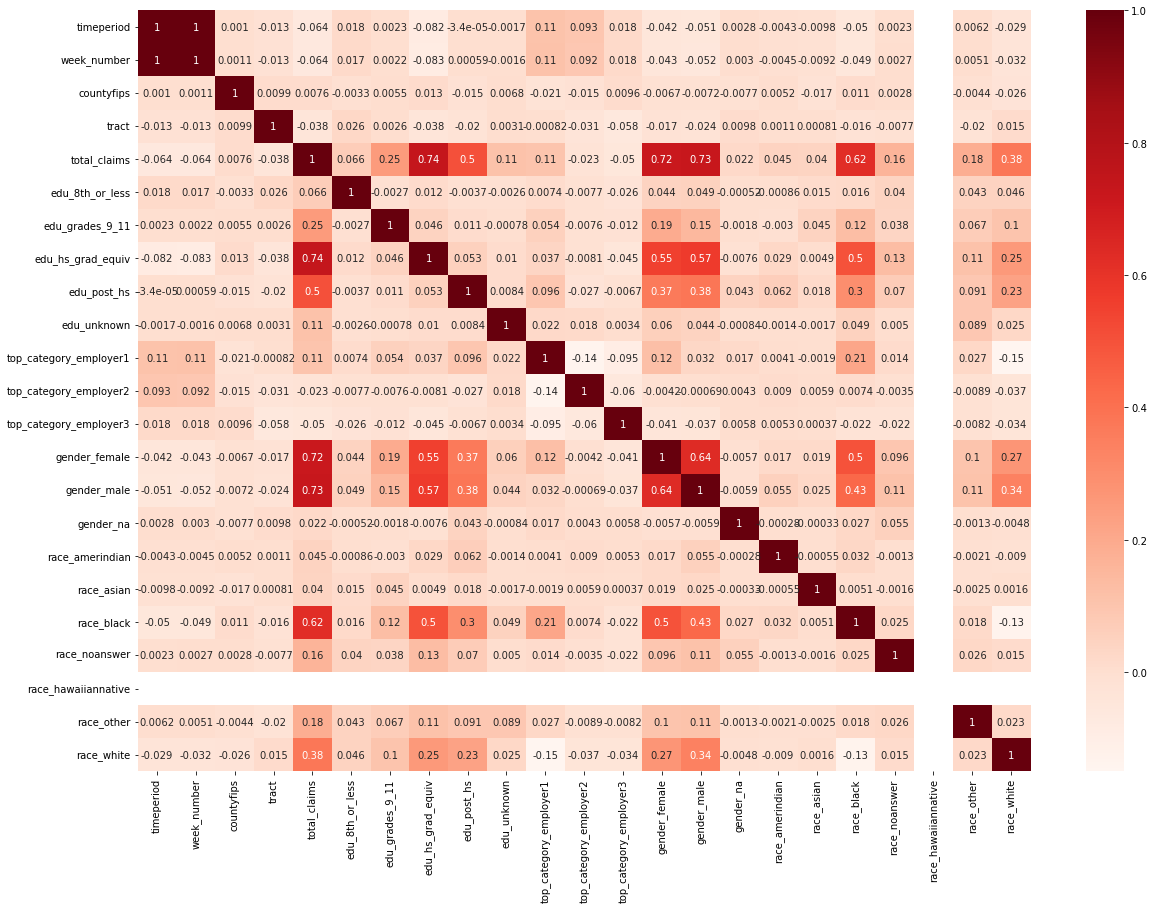

In [92]:
plt.figure(figsize=(20,14))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [93]:
f_df = mdf[["total_claims","edu_hs_grad_equiv","edu_post_hs",'gender_female', 'gender_male', 'race_black', 'race_white','timeperiod', 'week_number',"uu_id"]]
# f2_df = f_df.drop_duplicates()

In [94]:
f2_df = mdf[["total_claims","edu_hs_grad_equiv","edu_post_hs",'gender_female', 'gender_male', 'race_black', 'race_white','timeperiod', 'week_number',"uu_id"]]
# f2_df = f_df.drop_duplicates()

In [95]:
sorted(f2_df["uu_id"])
f2_df["uu_id"].value_counts()

cb304c84e572423d939db1dbb2009609    35
6e585a6e6fc9cd621d7f73b92c292214    35
f75b648bd705d4bce859fb3cbb02997f    35
db0fbb4c6e88a74d6387efab221c1a7a    35
a5d7cec02c6005b044e40dd7a42ce4d2    35
                                    ..
99c1cb11273b064dc48649886138eb8e     5
b67c2c4abede3730932f8d53aba0341a     4
747f8bc2b0c8c0a04d29caa4cfe327d2     4
6fbb60a508283bc1fb30c13ac419941a     3
f7f087af0599e6b2eaa4045ba1a0be50     3
Name: uu_id, Length: 525, dtype: int64

In [96]:
sorted(f2_df["uu_id"])
list(f2_df["uu_id"].value_counts())

[35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,


In [97]:
sorted(f2_df["uu_id"])
f2_df["uu_id"].value_counts()

cb304c84e572423d939db1dbb2009609    35
6e585a6e6fc9cd621d7f73b92c292214    35
f75b648bd705d4bce859fb3cbb02997f    35
db0fbb4c6e88a74d6387efab221c1a7a    35
a5d7cec02c6005b044e40dd7a42ce4d2    35
                                    ..
99c1cb11273b064dc48649886138eb8e     5
b67c2c4abede3730932f8d53aba0341a     4
747f8bc2b0c8c0a04d29caa4cfe327d2     4
6fbb60a508283bc1fb30c13ac419941a     3
f7f087af0599e6b2eaa4045ba1a0be50     3
Name: uu_id, Length: 525, dtype: int64

In [98]:
f1_df = f2_df.groupby(['week_number']).mean()
f1_df

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3303/3809547421.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f1_df = f2_df.groupby(['week_number']).mean()


,total_claims,edu_hs_grad_equiv,edu_post_hs,gender_female,gender_male,race_black,race_white,timeperiod
week_number,,,,,,,,
1,22.329787,6.844681,2.736170,4.257447,4.725532,3.595745,7.646809,20220101.0
2,26.622490,10.299197,4.002008,7.475904,7.815261,6.102410,9.536145,20220108.0
3,24.195021,8.854772,3.286307,5.863071,5.983402,4.748963,7.736515,20220115.0
5,25.057692,9.002137,3.536325,5.886752,6.532051,5.096154,8.209402,20220129.0
6,22.951648,7.345055,3.265934,4.087912,5.041758,3.828571,7.487912,20220205.0
7,22.098876,7.083146,2.294382,3.782022,4.294382,3.955056,6.883146,20220212.0
8,24.723502,8.723502,2.905530,4.831797,5.129032,4.990783,7.951613,20220219.0
9,25.116667,9.376190,3.104762,4.759524,5.485714,5.292857,6.919048,20220226.0
10,24.054591,7.960298,2.823821,3.972705,4.764268,4.806452,6.280397,20220305.0


data1 = f_df[f_df['uu_id'] == lst[0]]

In [99]:
data1 = f1_df.set_index('week_number')
data1.index

KeyError: "None of ['week_number'] are in the columns"

data1 = f_df[f_df['uu_id'] == lst[0]]

In [100]:
# data1 = f2_df.set_index('week_number')
# data1.index
f1_df.index

Int64Index([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
            37],
           dtype='int64', name='week_number')

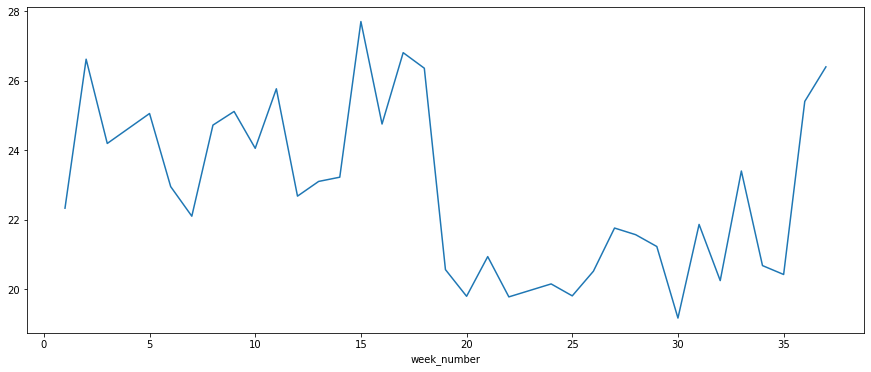

In [101]:
f1_df["total_claims"].plot(figsize=(15, 6))
plt.show()